Create a classifier for predicting breast cancer using information obtained from digitized images of a fine needle aspirate of a breast mass. 

### Notes:
* This is a binary classification problem
* Data source: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
* Papers using this datasource: check out the link above for example usages of the data + tried models
* Steps:    
    1. Download the data
    2. Visualise the data
    3. (If needed) clean, normalise, transform and visualise the data to get a feeling about potential relationships between the variables
    4. Try to find the most relevant features (feature selection)
    5. Try to create new features
    6. Agree on a metric (i.e. Precision and recall)
    7. Develop a classification model (start with simple models and then grow in complexity)    
    8. Analyse the results for train + test data and compare different models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_rows', None) 
pd.pandas.set_option('display.max_columns', None)

df = pd.read_csv('breast_cancer_data_wisconsin.csv', sep = ';')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,4.304801,4.835984,7.489124,2.366459,16.965766,0.851112,28.944267,23.266838,7.427398,40.337079,0.007041,0.176469,1.153794,0.067979,0.231228,0.014329,16.269190,25.677223,107.261213,880.583128,10.633281,23.401569,22.585529,8.745685,30.367174,1.964313,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,21.074558,26.827478,35.618994,16.155145,53.846023,7.103493,102.890874,129.448361,62.907908,45.491006,0.003003,1.678798,17.470924,0.784389,2.112944,0.251388,4.833242,6.146258,33.602542,569.356993,37.236433,86.179359,91.310437,39.465975,90.748044,14.464355,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,0.111500,0.360200,0.771400,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086410,0.065260,0.029580,0.020310,0.163400,0.057800,0.236600,0.856100,1.628000,17.850000,0.005169,0.013150,0.015090,0.007638,0.015180,0.002248,13.010000,21.080000,84.110000,515.300000,0.117800,0.150700,0.116800,0.064990,0.254900,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095940,0.094620,0.063870,0.033900,0.181400,0.061660,0.341600,1.154000,2.304000,24.530000,0.006380,0.020620,0.026020,0.010970,0.018780,0.003187,14.970000,25.410000,97.660000,686.500000,0.133800,0.227900,0.249200,0.101500,0.288400,0.080060,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.106100,0.132500,0.142500,0.077260,0.203600,0.066400,0.585800,1.510000,3.398000,45.190000,0.008146,0.032880,0.042560,0.014930,0.023700,0.004558,18.790000,29.720000,125.400000,1084.000000,0.150000,0.384200,0.431600,0.170800,0.331800,0.092110,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,123.000000,277.000000,313.000000,162.000000,304.000000,78.000000,726.000000,976.000000,968.000000,542.200000,0.031130,27.000000,396.000000,12.000000,31.000000,6.000000,36.040000,49.540000,251.200000,4254.000000,185.000000,709.000000,681.000000,291.000000,544.000000,173.000000,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
df['diagnosis'] = df['diagnosis'].replace('M', 1)
df['diagnosis'] = df['diagnosis'].replace('B', 0)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


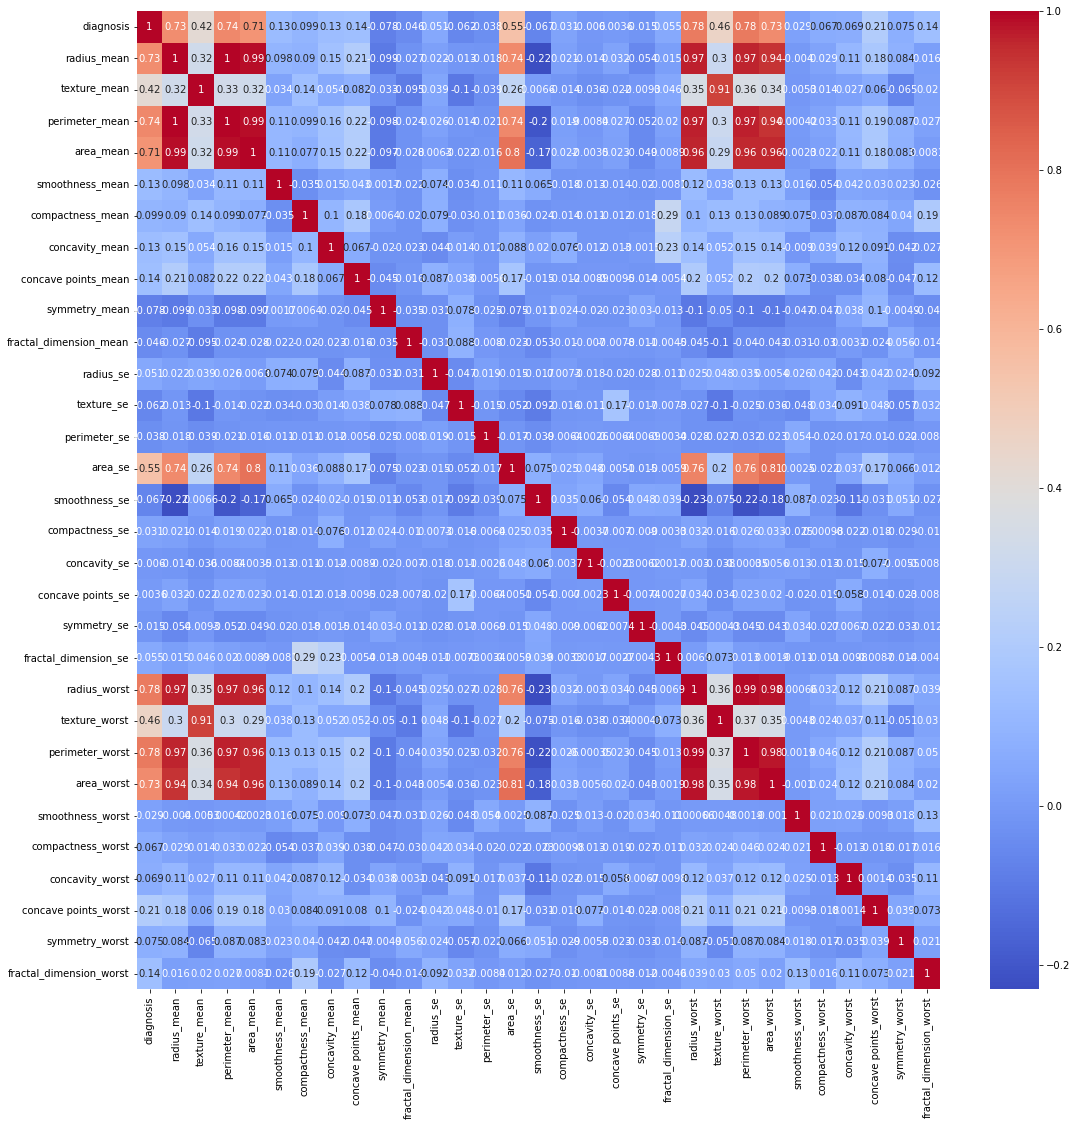

In [11]:
corr = df.corr()
plt.figure(figsize = (18, 18))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

In [12]:
cc = corr[abs(corr['diagnosis']) > 0.5].index

print('Number of correlated features is ', len(cc))
print('Most correlated features are: \n', cc)

Number of correlated features is  8
Most correlated features are: 
 Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'area_se',
       'radius_worst', 'perimeter_worst', 'area_worst'],
      dtype='object')


In [13]:
acc = df[df.columns[:]].corr()['diagnosis']
print(type(acc))
print(acc.keys()[0])
print(len(acc))
filtercols = []
for i in range(0, len(acc)):
    if acc[i] >= 0.4:
        filtercols.append(acc.keys()[i])
print(filtercols)
print(len(filtercols))
print('All features and their corr are: \n', acc)

<class 'pandas.core.series.Series'>
diagnosis
31
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']
10
All features and their corr are: 
 diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.128880
compactness_mean           0.099244
concavity_mean             0.132225
concave points_mean        0.141168
symmetry_mean             -0.077920
fractal_dimension_mean    -0.045698
radius_se                  0.051394
texture_se                -0.061700
perimeter_se              -0.038050
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.031178
concavity_se              -0.006027
concave points_se          0.003568
symmetry_se               -0.015008
fractal_dimension_se       0.055247
radi

In [14]:
# cc2 = corr[abs(corr['diagnosis']) <= 0.5].index
# print('Number of least correlated features is ', len(cc2))
# print('Least correlated features are: \n', cc2)

In [15]:
df1 = df[filtercols]
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,1,17.99,10.38,122.80,1001.0,153.40,25.38,17.33,184.60,2019.0
1,1,20.57,17.77,132.90,1326.0,74.08,24.99,23.41,158.80,1956.0
2,1,19.69,21.25,130.00,1203.0,94.03,23.57,25.53,152.50,1709.0
3,1,11.42,20.38,77.58,386.1,27.23,14.91,26.50,98.87,567.7
4,1,20.29,14.34,135.10,1297.0,94.44,22.54,16.67,152.20,1575.0


In [16]:
df1.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,40.337079,16.269190,25.677223,107.261213,880.583128
std,0.483918,3.524049,4.301036,24.298981,351.914129,45.491006,4.833242,6.146258,33.602542,569.356993
min,0.000000,6.981000,9.710000,43.790000,143.500000,6.802000,7.930000,12.020000,50.410000,185.200000
25%,0.000000,11.700000,16.170000,75.170000,420.300000,17.850000,13.010000,21.080000,84.110000,515.300000
50%,0.000000,13.370000,18.840000,86.240000,551.100000,24.530000,14.970000,25.410000,97.660000,686.500000
75%,1.000000,15.780000,21.800000,104.100000,782.700000,45.190000,18.790000,29.720000,125.400000,1084.000000
max,1.000000,28.110000,39.280000,188.500000,2501.000000,542.200000,36.040000,49.540000,251.200000,4254.000000


In [17]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

df1 = df1.drop('diagnosis', axis = 1)
x = df1.values
df1.columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

df1 = pd.DataFrame(x_scaled, columns = df1.columns)


df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,1.097064,-2.073335,1.269934,0.984375,2.487578,1.886690,-1.359293,2.303601,2.001237
1,1.829821,-0.353632,1.685955,1.908708,0.742402,1.805927,-0.369203,1.535126,1.890489
2,1.579888,0.456187,1.566503,1.558884,1.181336,1.511870,-0.023974,1.347475,1.456285
3,-0.768909,0.253732,-0.592687,-0.764464,-0.288378,-0.281464,0.133984,-0.249939,-0.550021
4,1.750297,-1.151816,1.776573,1.826229,1.190357,1.298575,-1.466770,1.338539,1.220724


In [18]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-1.088760e-16,-7.956924e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-7.378291e-01,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-4.947542e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.477828e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,1.067726e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,1.104184e+01,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00


In [19]:
df_to_be_added = df['diagnosis'].copy()
frames = [df_to_be_added, df1]
df_train = pd.concat(frames, axis = 1)
df_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,1,1.097064,-2.073335,1.269934,0.984375,2.487578,1.886690,-1.359293,2.303601,2.001237
1,1,1.829821,-0.353632,1.685955,1.908708,0.742402,1.805927,-0.369203,1.535126,1.890489
2,1,1.579888,0.456187,1.566503,1.558884,1.181336,1.511870,-0.023974,1.347475,1.456285
3,1,-0.768909,0.253732,-0.592687,-0.764464,-0.288378,-0.281464,0.133984,-0.249939,-0.550021
4,1,1.750297,-1.151816,1.776573,1.826229,1.190357,1.298575,-1.466770,1.338539,1.220724


In [20]:
%matplotlib inline
import plotly.express as px

for col in df_train.columns:
    fig = px.box(df_train[col], y = col)
    fig.show()

In [21]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']

def rem_out(col, df_train):
    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    return df_train[(df_train[col] >= low_limit) & (df_train[col] <= high_limit)]

for col in cols:
    df_train = rem_out(col, df_train)

df_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
3,1,-0.768909,0.253732,-0.592687,-0.764464,-0.288378,-0.281464,0.133984,-0.249939,-0.550021
5,1,-0.476375,-0.835335,-0.387148,-0.505650,-0.289258,-0.165498,-0.313836,-0.115009,-0.244320
7,1,-0.118517,0.358450,-0.072867,-0.218965,0.233722,0.163763,0.401048,0.099449,0.028859
8,1,-0.320167,0.588830,-0.184080,-0.384207,-0.352403,-0.161357,0.822813,-0.031609,-0.248363
10,1,0.537556,0.919273,0.442011,0.406453,0.003805,0.604849,1.335771,0.492622,0.473611


In [22]:
for col in df_train.columns:
    fig = px.box(df_train[col], y = col)
    fig.show()

In [23]:
df_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
3,1,-0.768909,0.253732,-0.592687,-0.764464,-0.288378,-0.281464,0.133984,-0.249939,-0.550021
5,1,-0.476375,-0.835335,-0.387148,-0.505650,-0.289258,-0.165498,-0.313836,-0.115009,-0.244320
7,1,-0.118517,0.358450,-0.072867,-0.218965,0.233722,0.163763,0.401048,0.099449,0.028859
8,1,-0.320167,0.588830,-0.184080,-0.384207,-0.352403,-0.161357,0.822813,-0.031609,-0.248363
10,1,0.537556,0.919273,0.442011,0.406453,0.003805,0.604849,1.335771,0.492622,0.473611


<AxesSubplot:>

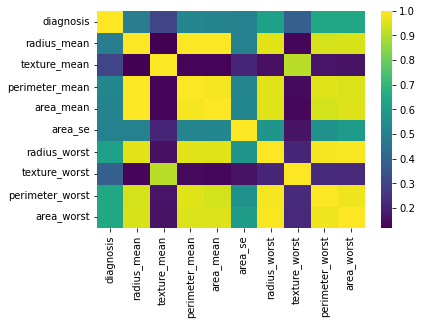

In [24]:
sns.heatmap(df_train.corr(), cmap = 'viridis')

In [25]:
from sklearn.model_selection import train_test_split

target = df_train['diagnosis']
features = df_train.drop(['diagnosis'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (348, 9)
Test data set size :  (88, 9)


In [26]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
360,-0.450813,-0.283820,-0.516897,-0.463558,-0.264836,-0.527893,-0.764914,-0.608859,-0.518379
531,-0.697906,0.169958,-0.690308,-0.678856,-0.549978,-0.604513,0.510153,-0.603497,-0.580082
54,0.276263,0.635371,0.217936,0.164705,-0.229414,0.379129,0.979143,0.310928,0.262662
123,0.105854,-1.954655,0.095189,-0.040355,-0.355263,-0.117869,-1.579133,-0.132881,-0.237464
404,-0.507616,-1.009865,-0.563442,-0.528403,-0.224133,-0.639717,-1.437458,-0.689578,-0.610845


In [27]:
y_train.head()

360    0
531    0
54     1
123    0
404    0
Name: diagnosis, dtype: int64

In [28]:
X_train.shape, y_train.shape

((348, 9), (348,))

                 precision    recall  f1-score   support

 Malign(Class 0       0.91      0.99      0.95        71
Benign(Class 1)       0.91      0.59      0.71        17

       accuracy                           0.91        88
      macro avg       0.91      0.79      0.83        88
   weighted avg       0.91      0.91      0.90        88



/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



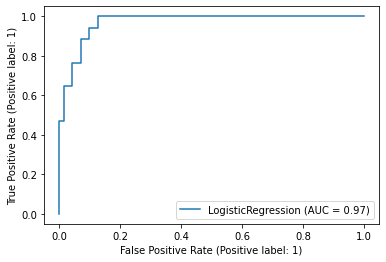

In [29]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

class_lr = LogisticRegression()
class_lr.fit(X_train, y_train)

pred_lr = class_lr.predict(X_test)
print(classification_report(y_test, pred_lr, target_names = ['Malign(Class 0', 'Benign(Class 1)']))

metrics.plot_roc_curve(class_lr, X_test, y_test)

/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



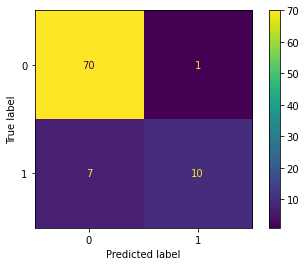

In [30]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(class_lr, X_test, y_test)
plt.show() 

In [31]:
print('Accuracy of Logistic Regression model is {}'.format(accuracy_score(y_test,pred_lr)*100))

Accuracy of Logistic Regression model is 90.9090909090909


              precision    recall  f1-score   support

           0       0.91      0.94      0.92        71
           1       0.71      0.59      0.65        17

    accuracy                           0.88        88
   macro avg       0.81      0.77      0.78        88
weighted avg       0.87      0.88      0.87        88



/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



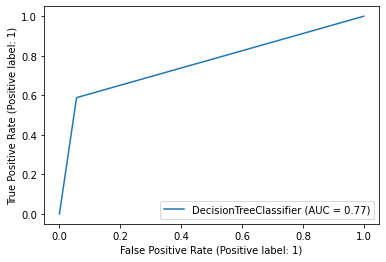

In [32]:
from sklearn.tree import DecisionTreeClassifier

class_dt = DecisionTreeClassifier()
class_dt.fit(X_train, y_train)

pred_dt = class_dt.predict(X_test)

print(classification_report(y_test, pred_dt))
metrics.plot_roc_curve(class_dt, X_test, y_test)

/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



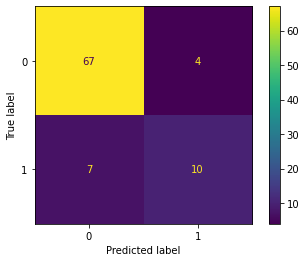

In [33]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(class_dt, X_test, y_test)
plt.show()

In [34]:
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test, pred_dt)*100))

Accuracy of Decision Tree model is 87.5


              precision    recall  f1-score   support

           0       0.91      0.99      0.95        71
           1       0.91      0.59      0.71        17

    accuracy                           0.91        88
   macro avg       0.91      0.79      0.83        88
weighted avg       0.91      0.91      0.90        88



/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



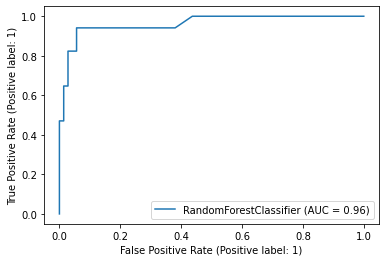

In [35]:
from sklearn.ensemble import RandomForestClassifier

class_rf = RandomForestClassifier()
class_rf.fit(X_train, y_train)

pred_rf = class_rf.predict(X_test)

print(classification_report(y_test, pred_rf))
metrics.plot_roc_curve(class_rf, X_test, y_test)

/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



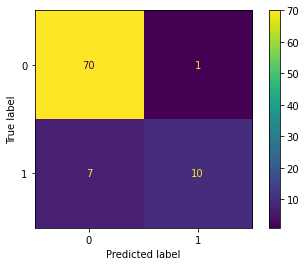

In [36]:
plot_confusion_matrix(class_rf, X_test, y_test)
plt.show()

In [37]:
print('Accuracy of Random Forest model is {}'.format(accuracy_score(y_test, pred_rf)*100))

Accuracy of Random Forest model is 90.9090909090909


/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:16:13] WARNING: ../src/learner.cc:576: 
Parameters: { "earning_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:16:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                  precision    recall  f1-score   support

 Malign(Class 0)       0.91      0.99      0.95        71
Benign (Class 1)       0.91      0.59      0.71        17

        accuracy                           0.91        88
       macro avg       0.91      0.79      0.83        88
    weighted avg       0.91      0.91      0.90        88



/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



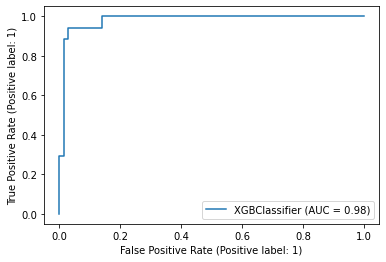

In [38]:
import xgboost as xgb

class_xgb = xgb.XGBClassifier(earning_rate=0.009, n_estimators=350, subsample=0.8, max_depth=7)
class_xgb.fit(X_train, y_train)

pred_xgb = class_xgb.predict(X_test)

print(classification_report(y_test, pred_xgb, 
                            target_names = ['Malign(Class 0)','Benign (Class 1)']))
metrics.plot_roc_curve(class_xgb, X_test, y_test)

/Users/crisd/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



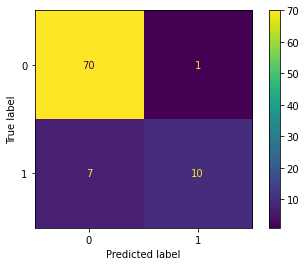

In [39]:
plot_confusion_matrix(class_xgb, X_test, y_test)
plt.show()

In [40]:
print('Accuracy of XGB model is {}'.format(accuracy_score(y_test, pred_xgb)*100))

Accuracy of XGB model is 90.9090909090909
